In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Please change to correct filepath for clean_data.csv
df=pd.read_csv("./clean_data.csv")
df.shape

(64032, 33)

In [2]:
# Getting a random sample of 20% of the data for demo purpose
df = df.sample(frac = 0.2)
print(df.shape)
# Dropping the irrelevant attributes
X=df.drop(columns=["avg_vote"])
Y=df["avg_vote"]
X.head()

(12806, 33)


,year,duration,director_popularity,writer_popularity,actors_popularity,production_company_popularity,month,day_of_week,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
2103,1985,89,4.80,5.73,4.89,5.50,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
54466,2017,93,5.00,5.00,4.00,5.00,6,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
16979,1995,161,5.91,4.86,6.06,5.00,2,5,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45756,2013,100,5.44,5.81,5.40,6.00,3,3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25914,2003,144,5.50,5.75,5.85,6.33,12,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=1)

In [5]:
#scaling the features before modelling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# To determine which kernel to apply-linear or non linear, lets check whether the data is linear or not
# Applying linear reg
from sklearn.linear_model import LinearRegression
log_regres = LinearRegression().fit(X, Y)
# Checking the accuracy
from sklearn.metrics import r2_score
print(r2_score(log_regres.predict(X), Y))

0.8221031486600632


# SVM Model

In [7]:
# since accuracy is 82 percent, we can apply linear kernel to our data
# train the SVM model
from sklearn.svm import SVC
sv_classifier = SVC(kernel='linear')


sv_model=sv_classifier.fit(X_train_scaled, y_train)


#predicting the y label i.e. "Dataset"
y_pred = sv_classifier.predict(X_test_scaled)     

# evaluating the SVM model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 10   4   2   1   0   0   0   0   0]
 [  3  39  32   1   0   0   0   0   0]
 [  0   9 113  39   4   0   0   0   0]
 [  0   1  20 226  89   3   0   0   0]
 [  0   0   0  39 515 108   1   0   0]
 [  0   0   1   0  75 727  48   0   0]
 [  0   1   0   0   8 122 268   0   0]
 [  0   1   1   0   0   5  28  13   0]
 [  0   0   0   0   0   0   1   4   0]]
              precision    recall  f1-score   support

           1       0.77      0.59      0.67        17
           2       0.71      0.52      0.60        75
           3       0.67      0.68      0.68       165
           4       0.74      0.67      0.70       339
           5       0.75      0.78      0.76       663
           6       0.75      0.85      0.80       851
           7       0.77      0.67      0.72       399
           8       0.76      0.27      0.40        48
           9       0.00      0.00      0.00         5

    accuracy                           0.75      2562
   macro avg       0.66      0.56      0.59      256

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# retreiving accuracy value from classification report

SVM_report=classification_report(y_test,y_pred,output_dict=True)

SVM_accuracy = SVM_report['accuracy']*100
print("Accuracy of SVM is : "+ str(SVM_accuracy))

Accuracy of SVM is : 74.59016393442623


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC curve for SVM

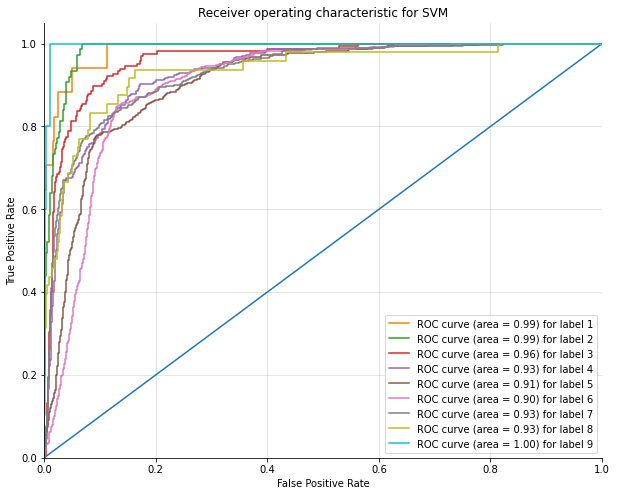

In [9]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
def plot_multiclass_svm(sv_classifier, X_test_scaled, y_test, n_classes, figsize=(10, 6)):
    y_score = sv_classifier.decision_function(X_test_scaled)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1])
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for SVM')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_svm(sv_classifier, X_test_scaled, y_test, n_classes=9, figsize=(10,8))

# Logistic Regression Model

In [10]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(multi_class='ovr',solver='liblinear', random_state=0)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.48      0.13      0.21        75
           3       0.43      0.20      0.27       165
           4       0.36      0.20      0.26       339
           5       0.49      0.49      0.49       663
           6       0.57      0.94      0.71       851
           7       0.71      0.36      0.48       399
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00         5

    accuracy                           0.54      2562
   macro avg       0.34      0.26      0.27      2562
weighted avg       0.52      0.54      0.49      2562



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# retreiving accuracy value from classification report

logistic_report=classification_report(y_test,y_pred,output_dict=True)

logistic_accuracy = logistic_report['accuracy']*100
print("Accuracy of Logistic Regression is : "+ str(logistic_accuracy))

Accuracy of Logistic Regression is : 53.86416861826698


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##ROC curve for Logistic Regression


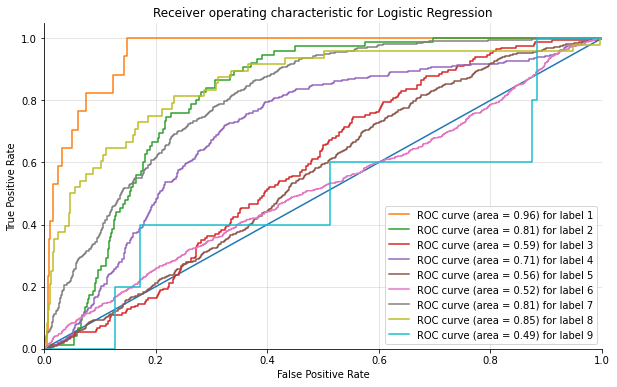

In [12]:

def plot_multiclass_logistic(logreg, X_test_scaled, y_test, n_classes, figsize=(10, 6)):
    y_score = logreg.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1])
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Logistic Regression')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_logistic(logreg, X_test_scaled, y_test, n_classes=9, figsize=(10,6))


# KNN Model

In [13]:
#KNN Model
k_values = np.arange(1, 16)
cross_validation_fold = 10
accuracies = []

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for k in k_values:
    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k)
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_val_score(knn, X, Y, cv=cross_validation_fold, scoring='accuracy')
    accuracies.append(scores.mean())
print(accuracies)

[0.5045285665495707, 0.49609844603825143, 0.49984368901249027, 0.5153836724238877, 0.5210856996487119, 0.5196004708235754, 0.5260825892857143, 0.5226466139734584, 0.517726080698673, 0.5185858826112412, 0.5185064768735362, 0.5173333211358314, 0.51460181254879, 0.5113218432864949, 0.5068701819867292]


Text(0.5, 0.98, 'kNN hyperparameter (k) tuning ')

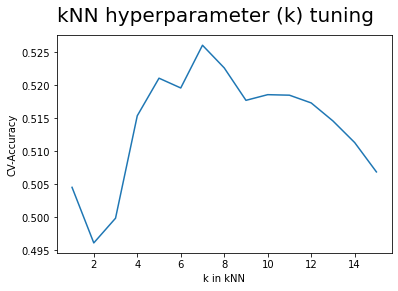

In [15]:
fig2 = plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
fig2.suptitle('kNN hyperparameter (k) tuning ', fontsize=20)

In [16]:
#building model using KNN CLassifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=7,metric="manhattan")
knn_model=knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  6   6   4   0   1   0   0   0   0]
 [  1  37  27   7   3   0   0   0   0]
 [  0   4 102  41  18   0   0   0   0]
 [  0   0  23 182 120  13   1   0   0]
 [  0   0   2  42 483 135   1   0   0]
 [  0   0   1   2 117 702  29   0   0]
 [  0   0   1   0  22 213 163   0   0]
 [  0   0   0   1   1  17  22   7   0]
 [  0   0   0   0   0   0   4   1   0]]
              precision    recall  f1-score   support

           1       0.86      0.35      0.50        17
           2       0.79      0.49      0.61        75
           3       0.64      0.62      0.63       165
           4       0.66      0.54      0.59       339
           5       0.63      0.73      0.68       663
           6       0.65      0.82      0.73       851
           7       0.74      0.41      0.53       399
           8       0.88      0.15      0.25        48
           9       0.00      0.00      0.00         5

    accuracy                           0.66      2562
   macro avg       0.65      0.46      0.50      256

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# retreiving accuracy value from classification report

Knn_report=classification_report(y_test,y_pred,output_dict=True)

Knn_accuracy = Knn_report['accuracy']*100
print("Accuracy of KNN is : "+ str(Knn_accuracy))

Accuracy of KNN is : 65.65183450429352


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC curve for KNN

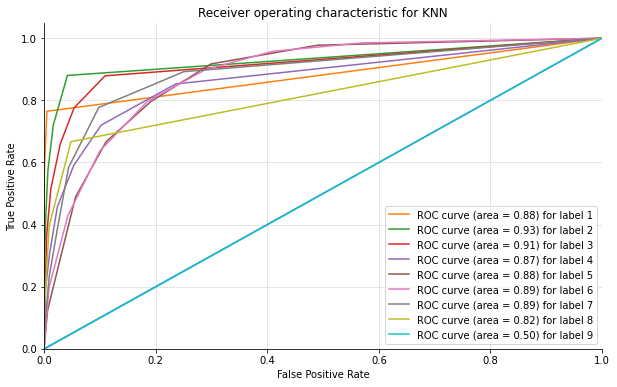

In [18]:
def plot_multiclass_knn(knn_classifier, X_test_scaled, y_test, n_classes, figsize=(10, 6)):
    y_score = knn_classifier.predict_proba(X_test_scaled)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1])
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for KNN')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_knn(knn_classifier, X_test_scaled, y_test, n_classes=9, figsize=(10,6))


#Decision Tree Model

In [19]:
# Decision Tree Model
from sklearn import tree


dt2 = tree.DecisionTreeClassifier(max_depth=2, criterion="gini")
#dt2 = tree.DecisionTreeRegressor(random_state=1, max_depth=6)
dt2.fit(X_train_scaled, y_train)
dt2_score_train = dt2.score(X_train_scaled, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(X_test_scaled, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.6340296759078485
Testing score:  0.6420765027322405


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt2.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0   0   0  15   2   0   0   0   0]
 [  0   0   0  73   2   0   0   0   0]
 [  0   0   0 149  15   1   0   0   0]
 [  0   0   0 238  92   8   1   0   0]
 [  0   0   0  54 524  79   6   0   0]
 [  0   0   0   8 166 622  55   0   0]
 [  0   0   0   1  43  94 261   0   0]
 [  0   0   0   0   3   7  38   0   0]
 [  0   0   0   0   2   0   3   0   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00       165
           4       0.44      0.70      0.54       339
           5       0.62      0.79      0.69       663
           6       0.77      0.73      0.75       851
           7       0.72      0.65      0.68       399
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00         5

    accuracy                           0.64      2562
   macro avg       0.28      0.32      0.30      256

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
dt3 = tree.DecisionTreeClassifier(max_depth=3,criterion="gini")

dt3.fit(X_train_scaled, y_train)
dt3_score_train = dt3.score(X_train_scaled, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(X_test_scaled, y_test)
print("Testing score: ",dt3_score_test)

Training score:  0.705486138227255
Testing score:  0.6920374707259953


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt3.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0   0  15   0   2   0   0   0   0]
 [  0   0  68   5   2   0   0   0   0]
 [  0   0 127  22  15   1   0   0   0]
 [  0   0  38 200  89  11   1   0   0]
 [  0   0   9  45 449 153   7   0   0]
 [  0   0   1   7  66 698  77   2   0]
 [  0   0   0   1  11  97 278  12   0]
 [  0   0   0   0   2   5  20  21   0]
 [  0   0   0   0   0   2   0   3   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        75
           3       0.49      0.77      0.60       165
           4       0.71      0.59      0.65       339
           5       0.71      0.68      0.69       663
           6       0.72      0.82      0.77       851
           7       0.73      0.70      0.71       399
           8       0.55      0.44      0.49        48
           9       0.00      0.00      0.00         5

    accuracy                           0.69      2562
   macro avg       0.43      0.44      0.43      256

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
dt4 = tree.DecisionTreeClassifier(max_depth=4,criterion="gini")
#dt4 = tree.DecisionTreeRegressor(random_state=1, max_depth=6)
dtree_model=dt4.fit(X_train_scaled, y_train)
dt4_score_train = dt4.score(X_train_scaled, y_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(X_test_scaled, y_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7307692307692307
Testing score:  0.7135050741608119


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt4.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0  11   4   1   1   0   0   0   0]
 [  0  30  38   7   0   0   0   0   0]
 [  0   2 125  31   6   1   0   0   0]
 [  0   0  38 229  60  11   1   0   0]
 [  0   0   9  61 433 153   7   0   0]
 [  0   0   1   7  66 697  78   2   0]
 [  0   0   0   2  10  82 293  12   0]
 [  0   0   0   2   0   4  21  21   0]
 [  0   0   0   0   0   0   2   3   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.70      0.40      0.51        75
           3       0.58      0.76      0.66       165
           4       0.67      0.68      0.67       339
           5       0.75      0.65      0.70       663
           6       0.74      0.82      0.77       851
           7       0.73      0.73      0.73       399
           8       0.55      0.44      0.49        48
           9       0.00      0.00      0.00         5

    accuracy                           0.71      2562
   macro avg       0.52      0.50      0.50      256

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# retreiving accuracy value from classification report

Dtree_report=classification_report(y_test,y_pred,output_dict=True)

Dtree_accuracy = Dtree_report['accuracy']*100
print("Accuracy of Decision Tree is : "+ str(Dtree_accuracy))

Accuracy of Decision Tree is : 71.35050741608119


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.6340296759078485   0.6420765027322405
3         0.705486138227255   0.6920374707259953
4        0.7307692307692307   0.7135050741608119


## ROC curve for decision tree



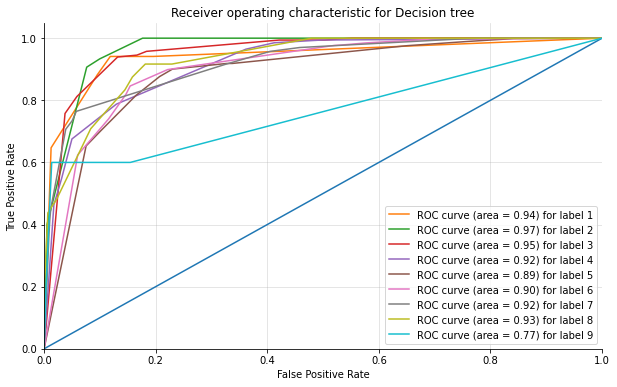

In [27]:
def plot_multiclass_dtree(dt4, X_test_scaled, y_test, n_classes, figsize=(10, 6)):
    y_score = dt4.predict_proba(X_test_scaled)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1])
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Decision tree')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_dtree(dt4, X_test_scaled, y_test, n_classes=9, figsize=(10,6))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


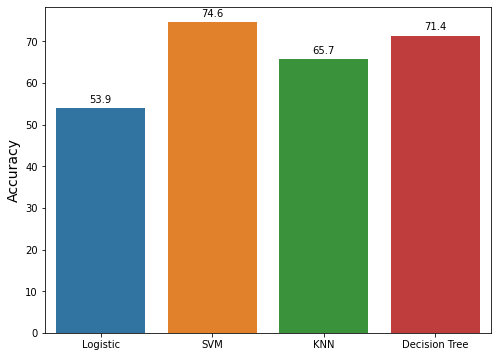

In [28]:
#visualizing Accuracy results of all the models
x = ['Logistic', 'SVM', 'KNN', 'Decision Tree']
y = [logistic_accuracy, SVM_accuracy, Knn_accuracy, Dtree_accuracy]
plt.figure(figsize=(8, 6))
splot=sns.barplot(x,y)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.ylabel("Accuracy", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")


In [29]:
# testing our model using SVM Classifier 
# We randomly took movie detail (features) of 5th row from our X_test set and passed to SVM classifier to check whether its predict accurately or not

demo=X_test_scaled[5]
y_pred = sv_classifier.predict(demo.reshape(1,-1))
y_pred



array([7])

In [30]:
# Actual observed value of rating for movie at row 5th which is same as predicted value in above cell
y_test.iloc[[5]]

7415    8
Name: avg_vote, dtype: int64